<a href="https://colab.research.google.com/github/InowaR/colab/blob/main/yolo_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 882.5/882.5 kB 12.9 MB/s eta 0:00:00


In [2]:
import ultralytics
ultralytics.checks()

Ultralytics 8.3.8 🚀 Python-3.10.12 torch-2.4.1+cu121 CPU (AMD EPYC 7B12)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 40.6/107.7 GB disk)



image 1/1 /content/orange.jpg: 640x640 1 orange, 161.7ms
Speed: 4.0ms preprocess, 161.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


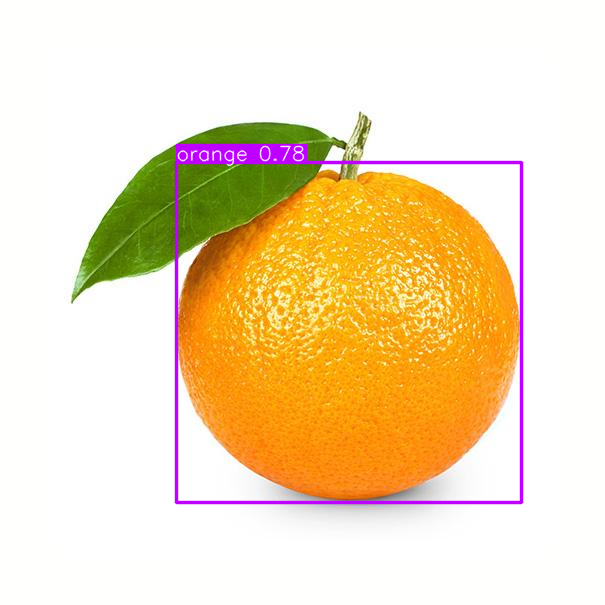

In [97]:
from ultralytics import YOLO

model = YOLO("yolo11n.pt")

results = model('orange.jpg')  # list images

for i, r in enumerate(results):
    xmin, ymin, xmax, ymax = r.boxes.xyxy[0].tolist()  # list objects
    r.show()
    r.save(filename=f"{i}.jpg")

In [100]:
from PIL import Image, ImageDraw

# Открываем исходное изображение
original_image = Image.open('0.jpg')
draw = ImageDraw.Draw(original_image)

# Получаем размеры изображения
width, height = original_image.size

# Вычисляем центр изображения
center_image = (width // 2, height // 2)

# Рисуем точку в центре изображения
draw.ellipse((center_image[0] - 5, center_image[1] - 5, center_image[0] + 5, center_image[1] + 5), fill='red')

# Обрабатываем результаты детектирования
for det in results[0].boxes:
    xmin, ymin, xmax, ymax = det.xyxy[0].tolist()

    # Вычисляем центр рамки детектирования
    center_box = ((xmin + xmax) // 2, (ymin + ymax) // 2)

    # Рисуем точку в центре рамки
    draw.ellipse((center_box[0] - 5, center_box[1] - 5, center_box[0] + 5, center_box[1] + 5), fill='blue')

# Сохраняем изображение с нарисованными точками
original_image.save('result_with_points.jpg')

# Показываем изображение
# original_image.show()
